In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
df = pd.read_csv('1000_Companies.csv')

In [6]:
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [15]:
df1 = df.drop('State', axis = 1)

In [16]:
df1

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.800,471784.1000,192261.83000
1,162597.70,151377.590,443898.5300,191792.06000
2,153441.51,101145.550,407934.5400,191050.39000
3,144372.41,118671.850,383199.6200,182901.99000
4,142107.34,91391.770,366168.4200,166187.94000
...,...,...,...,...
995,54135.00,118451.999,173232.6695,95279.96251
996,134970.00,130390.080,329204.0228,164336.60550
997,100275.47,241926.310,227142.8200,413956.48000
998,128456.23,321652.140,281692.3200,333962.19000


In [17]:
df1.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [18]:
df1.shape


(1000, 4)

In [20]:
df1.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


<AxesSubplot:>

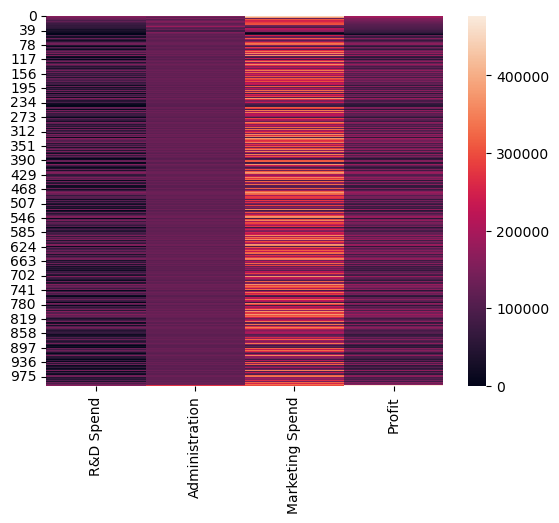

In [23]:
sns.heatmap(data=df1)

<AxesSubplot:>

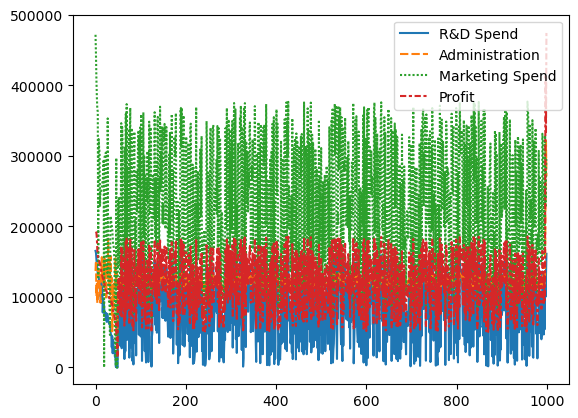

In [24]:
sns.lineplot(data = df1)

In [25]:
df1.tail()

,R&D Spend,Administration,Marketing Spend,Profit
995,54135.00,118451.999,173232.6695,95279.96251
996,134970.00,130390.080,329204.0228,164336.60550
997,100275.47,241926.310,227142.8200,413956.48000
998,128456.23,321652.140,281692.3200,333962.19000
999,161181.72,270939.860,295442.1700,476485.43000


In [27]:
!pip install sklearn

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
X = df1.drop(['Profit'], axis = 1).values
y= df1['Profit'].values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr = LinearRegression()

In [34]:
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = lr.predict(X_test)
y_pred

array([ 89190.67499275,  87828.24837017,  94290.55745529, 175890.39232027,
        83514.61204892, 110652.53759647, 131864.3300785 ,  90872.05856309,
       164633.43911143,  53532.65323126,  66368.95804148, 150796.53536364,
       126284.86067218,  58762.86226022, 176842.11882514,  75425.79378998,
       118504.71045207, 163913.21363057, 173108.79354901, 182091.19094822,
       121457.47388455,  85073.38589325, 181197.76835895,  83549.76594166,
       104393.43505293, 100624.2548291 ,  55142.57507276,  57006.02652609,
        68313.56692923, 210053.27059093, 121033.21637478, 111106.96558559,
       101575.98142444, 138199.44832124,  63391.16850898, 108242.35438566,
       186033.56808929, 171655.63776317, 174854.63940052, 117928.52998101,
        96823.35050304, 164790.34540587, 107109.71402755,  50506.84869823,
       116771.88217502,  58058.07016424, 158640.13405963,  78830.57406298,
       159950.25854026, 131383.88581041, 185082.69900943, 174819.48559825,
        93142.48372867,  

In [37]:
lr.predict([[165349.20, 136897.800, 471784.1000]])

array([201254.27618355])

In [38]:
from sklearn.metrics import r2_score

In [39]:
r2_score(y_test, y_pred)

0.921160768994541

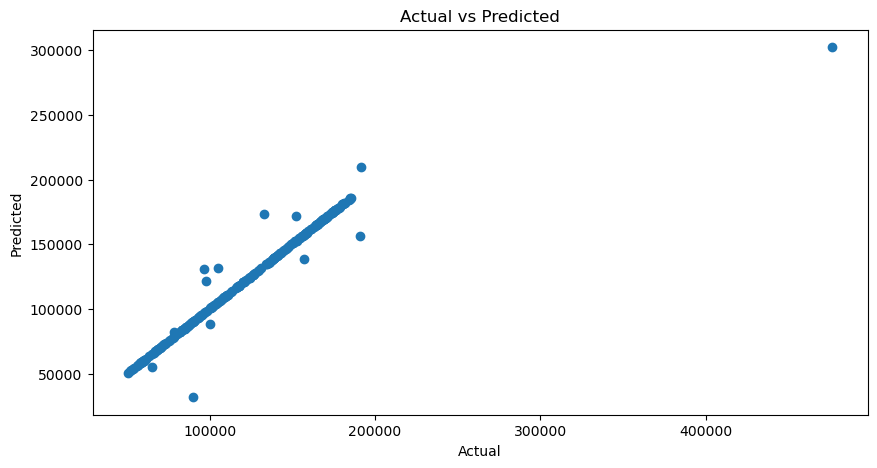

In [42]:
plt.figure(figsize = (10,5))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [46]:
pred_y_df = pd.DataFrame({'Actual Values' : y_test, 'Predicted Value' : y_pred, 'Difference' : y_test - y_pred})
pred_y_df

,Actual Values,Predicted Value,Difference
0,89012.02672,89190.674993,-178.648273
1,87654.55773,87828.248370,-173.690640
2,94093.35179,94290.557455,-197.205665
3,175396.26160,175890.392320,-494.130720
4,83356.61784,83514.612049,-157.994209
...,...,...,...
245,184979.70220,185508.832405,-529.130205
246,55832.20416,55889.676986,-57.472826
247,191050.39000,156110.160153,34940.229847
248,67282.27141,67381.560838,-99.289428
